In [1]:
# all the f'ing imports
import scipy.io as sio
import os,sys
sys.path.append('/home/mayank/work/pyutils')
import myutils
import re
import stephenHeadConfig as conf
import shutil

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import scipy
import cv2
import math
import lmdb
import caffe
from random import randint,sample
import pickle
import h5py


import mpld3
mpld3.enable_notebook()

In [2]:
import multiResData
reload(multiResData)

multiResData.createDB(conf)

Done 0 of 104 movies, count:0 val:3
Done 1 of 104 movies, count:3 val:3
Done 2 of 104 movies, count:5 val:3
Done 3 of 104 movies, count:7 val:3
Done 4 of 104 movies, count:9 val:3
Done 5 of 104 movies, count:9 val:5
Done 6 of 104 movies, count:12 val:5
Done 7 of 104 movies, count:12 val:8
Done 8 of 104 movies, count:15 val:8
Done 9 of 104 movies, count:15 val:11
Done 10 of 104 movies, count:15 val:14
Done 11 of 104 movies, count:15 val:17
Done 12 of 104 movies, count:18 val:17
Done 13 of 104 movies, count:21 val:17
Done 14 of 104 movies, count:24 val:17
Done 15 of 104 movies, count:24 val:20
Done 16 of 104 movies, count:26 val:20
Done 17 of 104 movies, count:29 val:20
Done 18 of 104 movies, count:29 val:23
Done 19 of 104 movies, count:32 val:23
Done 20 of 104 movies, count:35 val:23
Done 21 of 104 movies, count:38 val:23
Done 22 of 104 movies, count:40 val:23
Done 23 of 104 movies, count:40 val:25
Done 24 of 104 movies, count:42 val:25
Done 25 of 104 movies, count:45 val:25
Done 26 of 

In [ ]:
import multiResTrain
reload(multiResTrain)
multiResTrain.trainBase(conf)

 Iter 0, Training Loss= 212584.093750
 Iter 0, Minibatch Loss= 212583.084135
Saved state to /home/mayank/work/tensorflow/cacheHead/headBase_0.ckpt
 Iter 30, Training Loss= 3631.011230
 Iter 30, Minibatch Loss= 3631.097487
 Iter 60, Training Loss= 1316.699707
 Iter 60, Minibatch Loss= 1316.627779
 Iter 90, Training Loss= 1111.809814
 Iter 90, Minibatch Loss= 1111.874587
 Iter 120, Training Loss= 1142.252930
 Iter 120, Minibatch Loss= 1142.281550
 Iter 150, Training Loss= 1126.306152
 Iter 150, Minibatch Loss= 1126.332613
 Iter 180, Training Loss= 1118.339722
 Iter 180, Minibatch Loss= 1118.475839
 Iter 210, Training Loss= 1108.957764
 Iter 210, Minibatch Loss= 1109.068989
 Iter 240, Training Loss= 1095.137451
 Iter 240, Minibatch Loss= 1095.374624
 Iter 270, Training Loss= 1083.431396
 Iter 270, Minibatch Loss= 1083.941444
 Iter 300, Training Loss= 1074.956055
 Iter 300, Minibatch Loss= 1075.818744
 Iter 330, Training Loss= 1065.850220
 Iter 330, Minibatch Loss= 1067.427471
 Iter 360, T

In [ ]:
import stephenHeadConfig as conf
import multiResTrain
reload(multiResTrain)
multiResTrain.trainFine(conf,False)

Variable:0
Variable_1:0
Variable_2:0
Variable_3:0
Variable_4:0
Variable_5:0
Variable_6:0
Variable_7:0
Variable_8:0
Variable_9:0
Variable_10:0
Variable_11:0
Variable_12:0
Variable_13:0
Variable_14:0
Variable_15:0
Variable_16:0
Variable_17:0
Variable_18:0
Variable_19:0
Variable_20:0
Variable_21:0
Variable_22:0
Variable_23:0
Variable_24:0
Variable_25:0
Variable_26:0
Variable_27:0
Variable_28:0
Variable_29:0
Variable_30:0
Variable_31:0
Variable_32:0
Variable_33:0
Variable_34:0
Variable_35:0
fine_siamese/1_1/fine_1/weights:0
fine_siamese/1_1/fine_1/biases:0
fine_siamese/1_1/fine_2/weights:0
fine_siamese/1_1/fine_2/biases:0
fine_siamese/1_1/fine_3/weights:0
fine_siamese/1_1/fine_3/biases:0
fine_siamese/1_2/fine_1/weights:0
fine_siamese/1_2/fine_1/biases:0
fine_siamese/1_2/fine_2/weights:0
fine_siamese/1_2/fine_2/biases:0
fine_siamese/1_2/fine_3/weights:0
fine_siamese/1_2/fine_3/biases:0
fine_siamese/2_1/fine_1/weights:0
fine_siamese/2_1/fine_1/biases:0
fine_siamese/2_1/fine_2/weights:0
fine_

In [2]:
import tensorflow as tf

zz = tf.Variable('float32',[3,3])
sess = tf.InteractiveSession()
try:
    sess.run(tf.assert_variables_initialized([zz]))
except tf.errors.FailedPreconditionError:
        print('Not initialzed')

Not initialzed


In [1]:
import tensorflow as tf

import os,sys
sys.path.append('/home/mayank/work/caffe/python')

import caffe
import lmdb
import caffe.proto.caffe_pb2

from caffe.io import datum_to_array
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import scipy
import multiPawTools
import math
from convNetBase import *
import stephenHeadConfig as conf

In [2]:
# Network Parameters
n_input = conf.psz
n_classes = conf.n_classes # 
dropout = conf.dropout # Dropout, probability to keep units
imsz = conf.imsz
# tf Graph input
keep_prob = tf.placeholder(tf.float32) # dropout(keep probability)

x0 = tf.placeholder(tf.float32, [None, 
                                 imsz[0]/conf.rescale,
                                 imsz[1]/conf.rescale,1])
x1 = tf.placeholder(tf.float32, [None, 
                                 imsz[0]/conf.scale/conf.rescale,
                                 imsz[1]/conf.scale/conf.rescale,1])
x2 = tf.placeholder(tf.float32, [None, 
                                 imsz[0]/conf.scale/conf.scale/conf.rescale,
                                 imsz[1]/conf.scale/conf.scale/conf.rescale,1])

lsz0 = int(math.ceil(float(imsz[0])/conf.pool_scale/conf.rescale))
lsz1 = int(math.ceil(float(imsz[1])/conf.pool_scale/conf.rescale))
y = tf.placeholder(tf.float32, [None, lsz0,lsz1,n_classes])

weights = initNetConvWeights(conf)

In [3]:
#     lmdbfilename =os.path.join(conf.cachedir,conf.trainfilename)
#     vallmdbfilename =os.path.join(conf.cachedir,conf.valfilename)
#     env = lmdb.open(lmdbfilename, readonly = True)
#     valenv = lmdb.open(vallmdbfilename, readonly = True)
#     txn = env.begin()
#     valtxn = valenv.begin()

# Construct model
pred,layers = net_multi_conv(x0,x1,x2, weights, keep_prob,
                      imsz,conf.rescale,conf.pool_scale)


# Define loss and optimizer
cost = tf.reduce_mean(tf.nn.l2_loss(pred- y))

init = tf.initialize_all_variables()
saver = tf.train.Saver()

sess = tf.InteractiveSession()

sess.run(init)

saver.restore(sess, 'cacheHead/headBase_8000.ckpt')
 

# val_xs, locs = multiPawTools.readLMDB(val_cursor,batch_size*4,n_classes)
# x0_in = multiPawTools.scaleImages(val_xs.transpose([0,2,3,1]),conf.rescale)
# x1_in = multiPawTools.scaleImages(x0_in,conf.scale)
# x2_in = multiPawTools.scaleImages(x1_in,conf.scale)
# labelims = multiPawTools.createLabelImages(locs,
#                            conf.imsz,conf.pool_scale*conf.rescale,
#                            conf.label_blur_rad,1)
# out = sess.run([pred,cost], feed_dict={x0:x0_in,
#                                  x1:x1_in,
#                                  x2:x2_in,
#                            y: labelims, keep_prob: 1.})

In [4]:
import h5py
import multiResData

L = h5py.File(conf.labelfile)
pts = np.array(L['pts'])
ts = np.array(L['ts']).squeeze().astype('int')
expid = np.array(L['expidx']).squeeze().astype('int')

isval,localdirs,seldirs = multiResData.loadValdata(conf)



18


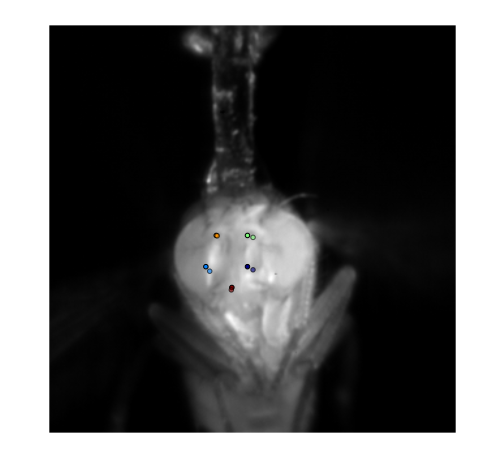

In [15]:
import cv2
import matplotlib.animation as manimation
sys.path.append('/home/mayank/work/pyutils')
import myutils
import matplotlib
import tempfile
import h5py
from matplotlib import cm
import random

fig = plt.figure(figsize = (8,8))
allidx = np.zeros((0))
L = h5py.File(conf.labelfile)
pts = np.array(L['pts'])
ts = np.array(L['ts']).squeeze().astype('int')
expid = np.array(L['expidx']).squeeze().astype('int')

for pcount in range(1):
    valnum = random.randrange(len(isval))
    selpts = np.where(expid==(isval[valnum]+1))

    isval,localdirs,seldirs = multiResData.loadValdata(conf)

    idx = np.random.choice(selpts[0])

    allidx = np.append(allidx,idx)
    print(idx)
    expnum = expid[idx]-1
    fnum = ts[idx]-1
    lpts = pts[idx,:,0,:]
    assert(isval.count(expnum)>0)
    curvid = localdirs[expnum]
    tdir = tempfile.mkdtemp()
    # plt.rcParams['animation.ffmpeg_path'] = '/usr/bin/ffmpeg'
    # FFMpegWriter = manimation.writers['mencoder_file']
    # writer = FFMpegWriter(fps=15,bitrate=2000)


    cap = cv2.VideoCapture(curvid)
    nframes = int(cap.get(cv2.cv.CV_CAP_PROP_FRAME_COUNT))
    plt.gray()
    # with writer.saving(fig,"test_results.mp4",4):
    count = 0
#     vidfilename = 'head_detect.avi'
    crop = conf.cropsz
    # for fnum in range(fnum,fnum+1):#range(nframes):
    plt.clf()
    framein = myutils.readframe(cap,fnum)
    framein = framein[np.newaxis,crop:-crop,crop:-crop,0:1]
    x0_in = multiPawTools.scaleImages(framein,conf.rescale)
    x1_in = multiPawTools.scaleImages(x0_in,conf.scale)
    x2_in = multiPawTools.scaleImages(x1_in,conf.scale)

    lsz0 = int(math.ceil(float(imsz[0])/conf.pool_scale/conf.rescale))
    lsz1 = int(math.ceil(float(imsz[1])/conf.pool_scale/conf.rescale))

    labelim = np.zeros([1,lsz0,lsz1,conf.n_classes])
    out = sess.run(pred, feed_dict={x0:x0_in,
                     x1:x1_in,
                     x2:x2_in,
                     y:labelim,
                     keep_prob: 1.})
    plt.imshow(x0_in[0,:,:,0])

    loc = np.zeros((0,2))
    for pp in range(out.shape[3]):
        maxndx = np.argmax(out[0,:,:,pp])
        curloc = np.array(np.unravel_index(maxndx,out.shape[1:3]))
        loc = np.append(loc,curloc[np.newaxis,:]*4,axis=0)
    plt.scatter(loc[:,1],loc[:,0],c=np.linspace(0,1,conf.n_classes),hold=True,cmap=cm.jet)
    plt.scatter((lpts[:,0]-200)/conf.rescale,(lpts[:,1]-200)/conf.rescale,
                    c=np.linspace(0,1,conf.n_classes),hold=True,alpha=0.6,cmap=cm.jet)
    # fname = "test_{:06d}.png".format(count)
    #     plt.savefig(os.path.join(tdir,fname))
    #     count+=1
    #     plt.imshow(out[0,:,:,0])
    plt.axis('off')
    fname = "head_result_val_{:d}.png".format(pcount)
#     plt.savefig(os.path.join('results','headResults',fname))

    #         writer.grab_frame()

    # ffmpeg_cmd = "ffmpeg -r 30 " + \
    # "-f image2 -i '/path/to/your/picName%d.png' -qscale 0 '/path/to/your/new/video.avi'

    # tfilestr = os.path.join(tdir,'test_*.png')
    # mencoder_cmd = "mencoder mf://" + tfilestr + \
    # " -frames " + "{:d}".format(count) + " -mf type=png:fps=15 -o " + \
    # vidfilename + " -ovc lavc -lavcopts vcodec=mpeg4:vbitrate=2000000"
    # print(mencoder_cmd)
    # os.system(mencoder_cmd)
    cap.release()


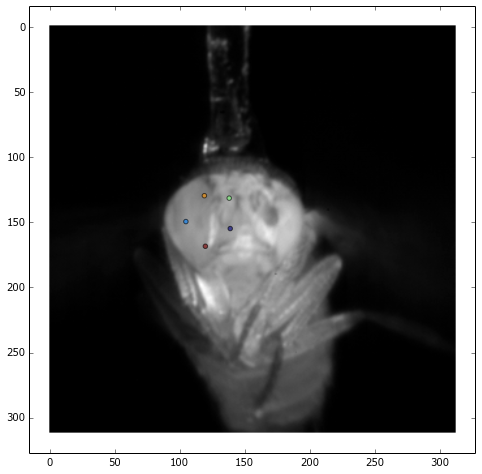

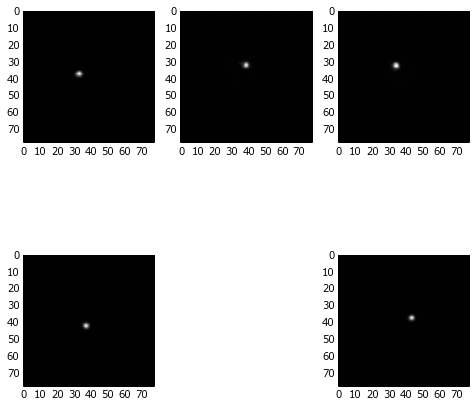

In [8]:
ptsel = 0
idx = int(allidx[ptsel])
expnum = expid[idx]-1
fnum = ts[idx]-1
lpts = pts[idx,:,1,:]

fig = plt.figure(figsize=(8,8))
assert(isval.count(expnum)>0)
curvid = localdirs[expnum]
tdir = tempfile.mkdtemp()
# plt.rcParams['animation.ffmpeg_path'] = '/usr/bin/ffmpeg'
# FFMpegWriter = manimation.writers['mencoder_file']
# writer = FFMpegWriter(fps=15,bitrate=2000)


cap = cv2.VideoCapture(curvid)
nframes = int(cap.get(cv2.cv.CV_CAP_PROP_FRAME_COUNT))
plt.gray()
# with writer.saving(fig,"test_results.mp4",4):
count = 0
#     vidfilename = 'head_detect.avi'
crop = conf.cropsz
# for fnum in range(fnum,fnum+1):#range(nframes):
plt.clf()
framein = myutils.readframe(cap,fnum)
framein = framein[np.newaxis,crop:-crop,crop:-crop,0:1]
x0_in = multiPawTools.scaleImages(framein,conf.rescale)
x1_in = multiPawTools.scaleImages(x0_in,conf.scale)
x2_in = multiPawTools.scaleImages(x1_in,conf.scale)

lsz0 = int(math.ceil(float(imsz[0])/conf.pool_scale/conf.rescale))
lsz1 = int(math.ceil(float(imsz[1])/conf.pool_scale/conf.rescale))

labelim = np.zeros([1,lsz0,lsz1,conf.n_classes])
out = sess.run(pred, feed_dict={x0:x0_in,
                 x1:x1_in,
                 x2:x2_in,
                 y:labelim,
                 keep_prob: 1.})

framein = multiPawTools.scaleImages(framein,conf.rescale)
framein = framein[0,:,:,0]
plt.imshow(framein)
plt.scatter((lpts[:,0]-200)/conf.rescale,(lpts[:,1]-200)/conf.rescale,
                    c=np.linspace(0,1,conf.n_classes),hold=True,alpha=0.6,cmap=cm.jet)
# plt.savefig(os.path.join('results/headResults/labelError.png'))
plt.show()
fig1 = plt.figure(figsize = (8,8))
plt.gray()
for pndx in range(5):
    plt.subplot(2,3,pndx)
    plt.imshow(out[0,:,:,pndx])

In [2]:
sess = tf.InteractiveSession()

In [1]:
import tensorflow as tf

jj = tf.random_normal([5,8],stddev=0.01)
print(jj)


Tensor("random_normal:0", shape=TensorShape([Dimension(5), Dimension(8)]), dtype=float32)


In [30]:
import multiPawTools
import numpy as np
import multiResTrain 

reload(multiPawTools)
reload(multiResTrain)

class cobj:
    fine_sz = 4
    
zz = np.random.rand(2,8,8)
maxndx = np.argmax(zz[0,:,:])
loc = np.unravel_index(maxndx,zz.shape[1:])
print(maxndx,loc,zz[0,loc[0],loc[1]])
maxndx = np.argmax(zz[1,:,:])
loc = np.unravel_index(maxndx,zz.shape[1:])
print(maxndx,loc,zz[1,loc[0],loc[1]])
print(zz)
conf = cobj()
Xin = tf.convert_to_tensor(zz)
layers = tf.unpack(Xin)
# layer = Xin
# out = Xin
# maxloc = multiPawTools.argmax2d(out)
# maxloc = tf.mul(maxloc,tf.to_int64(tf.fill(tf.shape(maxloc),1)))
# hsz = conf.fine_sz/2
# padsz = tf.fill([2,2],hsz)
# padlayer = tf.pad(layer,padsz)
# patchsz = tf.to_int64(tf.fill([2,],conf.fine_sz))
# ss =  tf.slice(padlayer,maxloc,patchsz)

ss = multiResTrain.extractPatches(Xin,Xin,conf,1)
# print(layers[0].eval().shape)
jj = ss.eval()
print(jj.shape)
# print(jj.shape)

(1, (0, 1), 0.98753577649130786)
(31, (3, 7), 0.98499934374456199)
[[[ 0.14824242  0.98753578  0.93180585  0.42599464  0.09252515  0.8424626
    0.94955257  0.79251032]
  [ 0.18230388  0.16798852  0.1606708   0.90789207  0.08268105  0.00733579
    0.73564267  0.42334979]
  [ 0.20811995  0.91009887  0.39217705  0.53823591  0.96671402  0.21256862
    0.77325412  0.62891449]
  [ 0.55654693  0.55242593  0.34512512  0.47174822  0.41532521  0.66298735
    0.00275779  0.75046339]
  [ 0.60993959  0.59826514  0.25907627  0.11363239  0.13658267  0.62099215
    0.67302193  0.24321345]
  [ 0.11500066  0.05622092  0.35399058  0.16874895  0.51367521  0.05272965
    0.53493331  0.19521109]
  [ 0.71195658  0.11742306  0.45009996  0.22929467  0.84811941  0.41840988
    0.04861362  0.64268282]
  [ 0.31191074  0.8284018   0.57356552  0.08007719  0.74067959  0.155791
    0.84766891  0.95427508]]

 [[ 0.11479873  0.85446381  0.20445987  0.94172698  0.43628805  0.36244504
    0.23074259  0.38869987]
  [ 0.7

In [177]:
import multiResTrain
reload(multiResTrain)
import stephenHeadConfig as conf
reload(conf)
import multiPawTools
reload(multiPawTools)

pool_scale = conf.pool_scale
scale = conf.scale
rescale = conf.rescale
layer1_1 = layers['base_dict_0']['conv1']
layer1_2 = layers['base_dict_0']['conv2']
layer2_1 = layers['base_dict_1']['conv1']
layer2_2 = layers['base_dict_1']['conv2']
ndx = 0
begin_t = tf.constant([0,0, 0, ndx])
size_t = tf.constant([-1,-1,-1,1])
curout = tf.squeeze(tf.slice(pred,begin_t,size_t))
layer = layer1_1
scale = conf.pool_scale
out = pred
hsz = conf.fine_sz/2
padsz = tf.constant([[0,0],[hsz, hsz],[hsz,hsz],[0,0]])
patchsz = tf.to_int64(tf.constant([1,conf.fine_sz,conf.fine_sz,-1]))

curfine1_1 = multiResTrain.extractPatches(layer1_1,out,conf,pool_scale)
maxloc = multiPawTools.argmax2d(out)*pool_scale
curfine1_2 = multiResTrain.extractPatches(layer1_2,out,conf,pool_scale/2)
curfine2_1 = multiResTrain.extractPatches(layer2_1,out,conf,pool_scale/scale)
curfine2_2 = multiResTrain.extractPatches(layer2_2,out,conf,pool_scale/2/scale)
ff = tf.concat(4,[curfine1_1,curfine1_2,curfine2_1,curfine2_2])
# out = sess.run(curfine1_1, feed_dict=x)
feed_dict = {x0:x0_in,
                 x1:x1_in,
                 x2:x2_in,
                 y:labelim,
                 keep_prob: 1.}
aa = tf.unpack(ff)
ll = sess.run(aa,feed_dict = feed_dict)


In [181]:

print(ll[0].shape)

(1, 36, 36, 352)


In [159]:
print(ll[0].shape)
print(ll[1])
ss = ll[2][:,148-18:148+18,172-18:172+18,:]
ss1 = ll[0]
print(ss.shape)
print(ss1[0,0,1:5,1:5,1])
print(ss[0,1:5,1:5,1])


(5, 1, 36, 36, 48)
[[[148 148 128 128 168]]

 [[172 132 152 136 148]]]
(1, 36, 36, 48)
[[ 22.26471138  22.01432991  21.71543694  21.52286148]
 [ 22.06751823  21.86920357  21.50693321  21.53661728]
 [ 22.17621994  21.92293358  21.56674576  21.69668198]
 [ 22.49229431  22.10362053  21.63529396  21.69375038]]
[[ 22.26471138  22.01432991  21.71543694  21.52286148]
 [ 22.06751823  21.86920357  21.50693321  21.53661728]
 [ 22.17621994  21.92293358  21.56674576  21.69668198]
 [ 22.49229431  22.10362053  21.63529396  21.69375038]]


In [50]:
zz1 = np.random.rand(5,8,8)
maxndx = np.argmax(zz1[0,:,:])
loc = np.unravel_index(maxndx,zz1.shape[1:])
print(maxndx,loc,zz1[0,loc[0],loc[1]])
maxndx = np.argmax(zz1[1,:,:])
loc = np.unravel_index(maxndx,zz1.shape[1:])
print(maxndx,loc,zz1[1,loc[0],loc[1]])
# print(zz1)

(29, (3, 5), 0.95665745146037484)
(59, (7, 3), 0.96434826576670363)


In [203]:
zz1 = np.random.rand(5,8,8,3)
Xin = tf.constant(zz1)
maxndx = np.argmax(zz1[0,:,:,2])
loc = np.unravel_index(maxndx,zz1.shape[1:3])
print(maxndx,loc,zz1[0,loc[0],loc[1]])
maxlocs = multiPawTools.argmax2d(Xin)
print(maxlocs.eval().shape)

(51, (6, 3), array([ 0.7449777 ,  0.76551264,  0.94150937]))
(2, 5, 3)


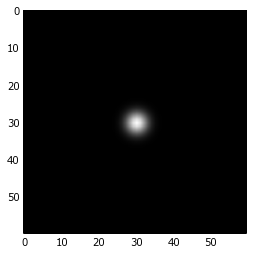

In [191]:
reload(multiPawTools)
reload(conf)
yy = multiPawTools.createFineLabelTensor(conf)
zz = yy.eval()
plt.imshow(zz)

In [48]:
zz1 = np.random.rand(2,5,5)
Xin = tf.placeholder(tf.float32,[None,5,5]) 
X2 = Xin*np.random.rand()
X1 = X2[0,1:3,1:3]
print(zz1)
X1.eval(feed_dict={Xin:zz1})

[[[ 0.33876232  0.2925495   0.64997913  0.62429467  0.65897184]
  [ 0.1575377   0.61202092  0.8521219   0.29397696  0.83262955]
  [ 0.36244986  0.08880429  0.06476104  0.14178381  0.54359795]
  [ 0.13987226  0.04229894  0.36751972  0.27366122  0.01970524]
  [ 0.79579933  0.94478752  0.204892    0.59175735  0.18651751]]

 [[ 0.39659436  0.52737908  0.26636021  0.99127091  0.87356385]
  [ 0.70936442  0.9362259   0.39420746  0.72195576  0.52328581]
  [ 0.18624827  0.57046852  0.3724682   0.92703354  0.29061834]
  [ 0.96340861  0.0059997   0.81961043  0.96523656  0.55160366]
  [ 0.52022263  0.95547144  0.04265617  0.42425965  0.72979752]]]


array([[ 0.16844782,  0.23453133],
       [ 0.02444179,  0.01782432]], dtype=float32)

In [1]:
# all the f'ing imports
import scipy.io as sio
import os,sys
sys.path.append('/home/mayank/work/pyutils')
import myutils
import re
import stephenHeadConfig as conf
import shutil
import tensorflow as tf

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import scipy
import cv2
import math
import lmdb
import caffe
from random import randint,sample
import pickle
import h5py
from convNetBase import *
import multiResData

import mpld3
mpld3.enable_notebook()

In [2]:
sess = tf.InteractiveSession()
# Parameters
learning_rate = conf.learning_rate;  training_iters = conf.training_iters
batch_size = conf.batch_size;        display_step = conf.display_step

# Network Parameters
n_input = conf.psz; n_classes = conf.n_classes; dropout = conf.dropout 
imsz = conf.imsz;   rescale = conf.rescale;     scale = conf.scale
pool_scale = conf.pool_scale

x0,x1,x2,y,keep_prob = createPlaceHolders(imsz,
                          rescale,scale,pool_scale,n_classes)
locs_ph = tf.placeholder(tf.float32,[16,5,2])
weights = initNetConvWeights(conf)
# Construct model
pred,layers = net_multi_conv(x0,x1,x2, weights, keep_prob,
                      imsz,rescale,pool_scale)

# training data stuff
lmdbfilename =os.path.join(conf.cachedir,conf.trainfilename)
env = lmdb.open(lmdbfilename, readonly = True)

saver = tf.train.Saver()
baseoutname = 'head_%d.ckpt'%(training_iters)
basemodelfile = os.path.join(conf.cachedir,baseoutname)

txn =  env.begin()
train_cursor = txn.cursor(); 



In [3]:
import multiResTrain
reload(multiResTrain)
labelT  = multiPawTools.createFineLabelTensor(conf)
layer1_1 = layers['base_dict_0']['conv1']
layer1_2 = layers['base_dict_0']['conv2']
layer2_1 = layers['base_dict_1']['conv1']
layer2_2 = layers['base_dict_1']['conv2']
curfine1_1 = multiResTrain.extractPatches(layer1_1,pred,conf,1,4)
curfine1_2 = multiResTrain.extractPatches(layer1_2,pred,conf,2,2)
curfine2_1 = multiResTrain.extractPatches(layer2_1,pred,conf,2,2)
curfine2_2 = multiResTrain.extractPatches(layer2_2,pred,conf,4,1)
curfine1_1u = tf.unpack(tf.transpose(curfine1_1,[1,0,2,3,4]))
curfine1_2u = tf.unpack(tf.transpose(curfine1_2,[1,0,2,3,4]))
curfine2_1u = tf.unpack(tf.transpose(curfine2_1,[1,0,2,3,4]))
curfine2_2u = tf.unpack(tf.transpose(curfine2_2,[1,0,2,3,4]))
finepred = fineOut(curfine1_1u,curfine1_2u,curfine2_1u,curfine2_2u,conf)    
limgs = multiPawTools.createFineLabelImages(locs_ph,pred,conf,labelT)


In [4]:
# Keep training until reach max iterations
init = tf.initialize_all_variables()
sess.run(init)
saver.restore(sess, basemodelfile)
reload(multiPawTools)
batch_xs, locs = multiPawTools.readLMDB(train_cursor,
                        batch_size,imsz,multiResData)

locs = multiResData.sanitizelocs(locs)

x0_in,x1_in,x2_in = multiPawTools.multiScaleImages(
    batch_xs.transpose([0,2,3,1]),rescale,scale)

# labelims = multiPawTools.createLabelImages(locs,
#                    conf.imsz,conf.pool_scale*conf.rescale,
#                    conf.label_blur_rad) 
feed_dict = {x0:x0_in,x1:x1_in,x2:x2_in,keep_prob:1.,locs_ph:np.array(locs)}

maxlocs = multiPawTools.argmax2d(pred)
############# new stuff

limgs = multiPawTools.createFineLabelImages(locs_ph,pred,conf,labelT)

lout = sess.run(finepred,feed_dict=feed_dict)

In [5]:
print(lout.shape)

(16, 36, 36, 5)


1.0
(60, 60)


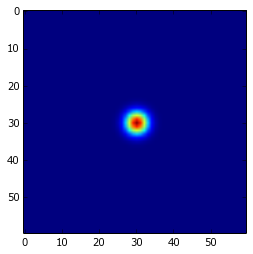

In [7]:
zz = labelT.eval()
print(zz.max())
plt.imshow(zz)
print(zz.shape)

In [ ]:
import scipy.io as sio
import os,sys
sys.path.append('/home/mayank/work/pyutils')
import myutils
import re
import stephenHeadConfig as conf
import shutil

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import scipy
import cv2
import math
import lmdb
import caffe
from random import randint,sample
import pickle
import h5py

'''
Mayank Feb 3 2016
'''

import tensorflow as tf
import os,sys
import tempfile
import copy
sys.path.append('/home/mayank/work/caffe/python')
sys.path.append('/home/mayank/work/pyutils')

import caffe
import lmdb
import caffe.proto.caffe_pb2
from caffe.io import datum_to_array
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as manimation
import math
import cv2
import numpy as np
import scipy

import multiPawTools
import myutils
from convNetBase import *

# import stephenHeadConfig as conf
import multiResData

import mpld3
mpld3.enable_notebook()
from multiResTrain import *


jointTrain = False

learning_rate = conf.learning_rate;  
batch_size = conf.batch_size;        display_step = conf.display_step
n_input = conf.psz; n_classes = conf.n_classes; dropout = conf.dropout 
imsz = conf.imsz;   rescale = conf.rescale;     scale = conf.scale
pool_scale = conf.pool_scale

x0,x1,x2,y,keep_prob = createPlaceHolders(imsz,rescale,scale,pool_scale,n_classes)
locs_ph = tf.placeholder(tf.float32,[conf.batch_size,5,2])

weights = initNetConvWeights(conf)
pred_gradient,layers = net_multi_conv(x0,x1,x2, weights, keep_prob,
                      imsz,rescale,pool_scale)

baseoutname = '%s_%d.ckpt'%(conf.outname,conf.base_training_iters)
basemodelfile = os.path.join(conf.cachedir,baseoutname)

sess = tf.InteractiveSession()
saver = tf.train.Saver()

if jointTrain:
    pred = pred_gradient
    training_iters = conf.joint_training_iters
    outname = conf.jointoutname
else:
    pred = tf.stop_gradient(pred_gradient)
    training_iters = conf.fine_training_iters
    outname = conf.fineoutname
    saver.restore(sess, basemodelfile)

# Construct fine model
labelT  = multiPawTools.createFineLabelTensor(conf)
layer1_1 = layers['base_dict_0']['conv1']
layer1_2 = layers['base_dict_0']['conv2']
layer2_1 = layers['base_dict_1']['conv1']
layer2_2 = layers['base_dict_1']['conv2']
curfine1_1 = extractPatches(layer1_1,pred,conf,1,4)
curfine1_2 = extractPatches(layer1_2,pred,conf,2,2)
curfine2_1 = extractPatches(layer2_1,pred,conf,2,2)
curfine2_2 = extractPatches(layer2_2,pred,conf,4,1)
curfine1_1u = tf.unpack(tf.transpose(curfine1_1,[1,0,2,3,4]))
curfine1_2u = tf.unpack(tf.transpose(curfine1_2,[1,0,2,3,4]))
curfine2_1u = tf.unpack(tf.transpose(curfine2_1,[1,0,2,3,4]))
curfine2_2u = tf.unpack(tf.transpose(curfine2_2,[1,0,2,3,4]))
finepred = fineOut(curfine1_1u,curfine1_2u,curfine2_1u,curfine2_2u,conf)    
limgs = multiPawTools.createFineLabelImages(locs_ph,pred,conf,labelT)

# training data stuff
lmdbfilename =os.path.join(conf.cachedir,conf.trainfilename)
vallmdbfilename =os.path.join(conf.cachedir,conf.valfilename)
env = lmdb.open(lmdbfilename, readonly = True)
valenv = lmdb.open(vallmdbfilename, readonly = True)

# Define loss and optimizer
costFine = tf.reduce_mean(tf.nn.l2_loss(finepred- tf.to_float(limgs)))
lmdbfilename =os.path.join(conf.cachedir,conf.trainfilename)
vallmdbfilename =os.path.join(conf.cachedir,conf.valfilename)
env = lmdb.open(lmdbfilename, readonly = True)
valenv = lmdb.open(vallmdbfilename, readonly = True)

# Define loss and optimizer
costFine = tf.reduce_mean(tf.nn.l2_loss(finepred- tf.to_float(limgs)))
costBase =  tf.reduce_mean(tf.nn.l2_loss(pred- y))

if jointTrain:
    cost = costFine + conf.trainRatio*costBase
    fineoutname = '%s_%d.ckpt'%(conf.fineoutname,conf.base_training_iters)
    finemodelfile = os.path.join(conf.cachedir,fineoutname)
    saver.restore(sess, finemodelfile)
else:
    cost = costFine

optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

init = tf.initialize_all_variables()
sess.run(init)

txn =  env.begin(); valtxn = valenv.begin()
train_cursor = txn.cursor(); val_cursor = valtxn.cursor()

batch_xs, locs = multiPawTools.readLMDB(train_cursor,
                        batch_size,imsz,multiResData)

locs = multiResData.sanitizelocs(locs)

x0_in,x1_in,x2_in = multiPawTools.multiScaleImages(
    batch_xs.transpose([0,2,3,1]),rescale,scale)

labelims = multiPawTools.createLabelImages(locs,
                   conf.imsz,conf.pool_scale*conf.rescale,
                   conf.label_blur_rad) 
feed_dict={x0: x0_in,x1: x1_in,x2: x2_in,
    y: labelims, keep_prob: dropout,locs_ph:np.array(locs)}


yyy = tf.all_variables()

# for ndx,chh in enumerate(yyy):
#     print (ndx,chh.name,chh.get_shape())

with tf.variable_scope('fine_siamese') as scope:
    scope.reuse_variables()
    f1 = tf.get_variable('1_1/fine_1/weights',[5,5,48,conf.fine_nfilt])
    f2 = tf.get_variable('1_1/fine_2/weights',[5,5,conf.fine_nfilt,conf.fine_nfilt])
    f3 = tf.get_variable('1_1/fine_3/weights',[5,5,conf.fine_nfilt,conf.fine_nfilt/2])
    f4 = tf.get_variable('1_2/fine_1/weights',[5,5,128,conf.fine_nfilt])
    f5 = tf.get_variable('1_2/fine_2/weights',[5,5,conf.fine_nfilt,conf.fine_nfilt])
    f6 = tf.get_variable('1_2/fine_3/weights',[5,5,conf.fine_nfilt,conf.fine_nfilt/2])
ps = []    
for ndx in range(5):
    with tf.variable_scope('point_' + str(ndx)) as scope:
        scope.reuse_variables()
        ps.append(tf.get_variable('weights',[1,1,conf.fine_nfilt/2,1]))
gg = tf.gradients(cost,[f1,f2,f3,f4,f5,f6]+ps)
aa = sess.run(gg+[finepred,limgs],feed_dict=feed_dict)

In [ ]:
import scipy.io as sio
import os,sys
sys.path.append('/home/mayank/work/pyutils')
import myutils
import re
import stephenHeadConfig as conf
import shutil

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import scipy
import cv2
import math
import lmdb
import caffe
from random import randint,sample
import pickle
import h5py

'''
Mayank Feb 3 2016
'''

import tensorflow as tf
import os,sys
import tempfile
import copy
sys.path.append('/home/mayank/work/caffe/python')
sys.path.append('/home/mayank/work/pyutils')

import caffe
import lmdb
import caffe.proto.caffe_pb2
from caffe.io import datum_to_array
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as manimation
import math
import cv2
import numpy as np
import scipy

import multiPawTools
import myutils
from convNetBase import *

# import stephenHeadConfig as conf
import multiResData

import mpld3
mpld3.enable_notebook()
from multiResTrain import *



learning_rate = conf.learning_rate;  
batch_size = conf.batch_size;        display_step = conf.display_step
n_input = conf.psz; n_classes = conf.n_classes; dropout = 1
imsz = conf.imsz;   rescale = conf.rescale;     scale = conf.scale
pool_scale = conf.pool_scale

x0,x1,x2,y,keep_prob = createPlaceHolders(imsz,rescale,scale,pool_scale,n_classes)
locs_ph = tf.placeholder(tf.float32,[conf.batch_size,5,2])
print('Constructing Base Network')
weights = initNetConvWeights(conf)
pred_gradient,layers = net_multi_conv(x0,x1,x2, weights, keep_prob,
                      imsz,rescale,pool_scale)

print('Done Constructing Base Network')
baseoutname = '%s_%d.ckpt'%(conf.outname,conf.base_training_iters)
basemodelfile = os.path.join(conf.cachedir,baseoutname)


pred = pred_gradient
print('Constructing Fine Network')

# Construct fine model
labelT  = multiPawTools.createFineLabelTensor(conf)
layer1_1 = layers['base_dict_0']['conv1']
layer1_2 = layers['base_dict_0']['conv2']
layer2_1 = layers['base_dict_1']['conv1']
layer2_2 = layers['base_dict_1']['conv2']
curfine1_1 = extractPatches(layer1_1,pred,conf,1,4)
curfine1_2 = extractPatches(layer1_2,pred,conf,2,2)
curfine2_1 = extractPatches(layer2_1,pred,conf,2,2)
curfine2_2 = extractPatches(layer2_2,pred,conf,4,1)
curfine1_1u = tf.unpack(tf.transpose(curfine1_1,[1,0,2,3,4]))
curfine1_2u = tf.unpack(tf.transpose(curfine1_2,[1,0,2,3,4]))
curfine2_1u = tf.unpack(tf.transpose(curfine2_1,[1,0,2,3,4]))
curfine2_2u = tf.unpack(tf.transpose(curfine2_2,[1,0,2,3,4]))
finepred = fineOut(curfine1_1u,curfine1_2u,curfine2_1u,curfine2_2u,conf)    
limgs = multiPawTools.createFineLabelImages(locs_ph,pred,conf,labelT)
print('Done Constructing Fine Network')

# training data stuff
lmdbfilename =os.path.join(conf.cachedir,conf.trainfilename)
vallmdbfilename =os.path.join(conf.cachedir,conf.valfilename)
env = lmdb.open(lmdbfilename, readonly = True)
valenv = lmdb.open(vallmdbfilename, readonly = True)

# Define loss and optimizer
costFine = tf.reduce_mean(tf.nn.l2_loss(finepred- tf.to_float(limgs)))
lmdbfilename =os.path.join(conf.cachedir,conf.trainfilename)
vallmdbfilename =os.path.join(conf.cachedir,conf.valfilename)
env = lmdb.open(lmdbfilename, readonly = True)
valenv = lmdb.open(vallmdbfilename, readonly = True)

sess = tf.InteractiveSession()
saver = tf.train.Saver()

fineoutname = '%s_%d.ckpt'%(conf.fineoutname,conf.fine_training_iters)
print('Restoring')
finemodelfile = os.path.join(conf.cachedir,fineoutname)
saver.restore(sess, finemodelfile)
print('Done Restoring from %s'%(fineoutname))

# init = tf.initialize_all_variables()
# sess.run(init)

In [38]:
reload(multiPawTools)
valtxn = valenv.begin()
val_cursor = valtxn.cursor()

predError = np.zeros([0,conf.n_classes,2])
fineError = np.zeros([0,conf.n_classes,2])
all_ims = np.zeros([0,1,conf.imsz[0],conf.imsz[1]])
all_labels = np.zeros([0,78,78,conf.n_classes])
all_locs = np.zeros([0,conf.n_classes,2])
base_pred = np.zeros([0,78,78,conf.n_classes])
fine_pred = np.zeros([0,conf.fine_sz,conf.fine_sz,conf.n_classes])
base_predlocs = np.zeros([0,conf.n_classes,2])
fine_predlocs = np.zeros([0,conf.n_classes,2])

for count in range(279/conf.batch_size):

    batch_xs, locs = multiPawTools.readLMDB(val_cursor,
                            conf.batch_size,imsz,multiResData)

    locs = multiResData.sanitizelocs(locs)
    all_ims = np.concatenate([all_ims,batch_xs],0)
    all_locs = np.concatenate([all_locs,locs],0)

    x0_in,x1_in,x2_in = multiPawTools.multiScaleImages(
        batch_xs.transpose([0,2,3,1]),rescale,scale)

    labelims = multiPawTools.createLabelImages(locs,
                       conf.imsz,conf.pool_scale*conf.rescale,
                       conf.label_blur_rad) 
    all_labels = np.append(all_labels, labelims,0)
    feed_dict={x0: x0_in,x1: x1_in,x2: x2_in,
        y: labelims, keep_prob: dropout,locs_ph:np.array(locs)}
    out = sess.run([pred,finepred],feed_dict=feed_dict)
    curpred = out[0]
    curfinepred = out[1]
    
    base_pred = np.append(base_pred,curpred,0)
    fine_pred = np.append(fine_pred,curfinepred,0)
    
    for ndx in range(curpred.shape[0]):
        curbaselocs = np.zeros([conf.n_classes,2])
        curfinelocs = np.zeros([conf.n_classes,2])
        for cls in range(conf.n_classes):
            maxndx = np.argmax(curpred[ndx,:,:,cls])
            predloc = np.array(np.unravel_index(maxndx,curpred.shape[1:3]))
            predloc = predloc * conf.pool_scale * conf.rescale
            maxndx = np.argmax(curfinepred[ndx,:,:,cls])
            finepredloc = np.unravel_index(maxndx,curfinepred.shape[1:3])
            curbaselocs[cls,:] = predloc
            curfinelocs[cls,:] = predloc+finepredloc-conf.fine_sz/2
        base_predlocs = np.append(base_predlocs,curbaselocs[np.newaxis,:,:],0)
        fine_predlocs = np.append(fine_predlocs,curfinelocs[np.newaxis,:,:],0)
        
    curbaseError,curfineError = multiPawTools.getFineError(locs,curpred,curfinepred,conf)
    predError = np.concatenate([predError,curbaseError],0)
    fineError = np.concatenate([fineError,curfineError],0)

print('Done')

Done


In [32]:
print(base_predlocs.shape)
print(all_locs.shape)
print(base_predlocs[0,:,:])
print(all_locs[0,:,:])
print(predError[0,:,:])

(256, 5, 2)
(256, 5, 2)
[[ 336.  408.]
 [ 352.  336.]
 [ 296.  376.]
 [ 312.  328.]
 [ 368.  376.]]
[[ 411.  339.]
 [ 341.  359.]
 [ 381.  303.]
 [ 334.  317.]
 [ 373.  374.]]
[[-3. -3.]
 [-5. -7.]
 [-5. -7.]
 [-6. -5.]
 [ 3. -6.]]


In [39]:
#print(locs[-1])
#print(out[0].shape)
#maxndx = np.argmax(out[0][-1,:,:,0])
#aa = np.array(np.unravel_index(maxndx,out[0].shape[1:3]))
#print(maxndx,aa*8)
dpred = np.sqrt(predError[:,:,0]**2 + predError[:,:,1]**2)
dfine = np.sqrt(fineError[:,:,0]**2 + fineError[:,:,1]**2)
print(dpred.mean())
print(dfine.mean())
print(dpred.mean(0))
print(dfine.mean(0))


7.20114086468
5.88081562861
[ 6.67385791  7.022216    7.91916024  7.39635893  6.99411124]
[ 4.82353619  5.58471188  6.74302451  6.01295142  6.23985415]


(10,)
(2, 10)


<Container object of 10 artists>

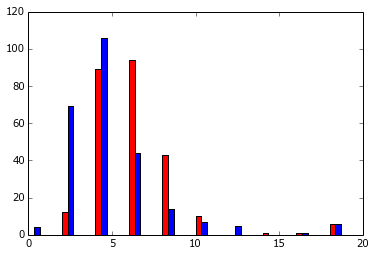

In [40]:
dd1,bb = np.histogram(abs(dpred.mean(1)).flatten(),range(0,20,2)+[100])
dd2,bb = np.histogram(abs(dfine.mean(1)).flatten(),range(0,20,2)+[100])
print(dd1.shape)
print(oo.shape)
fig,ax = plt.subplots()
width = 0.35
ax.bar(bb[0:-1],dd1,width=width,color='r')
ax.bar(bb[0:-1]+width,dd2,width=width,color='b')



(7,)


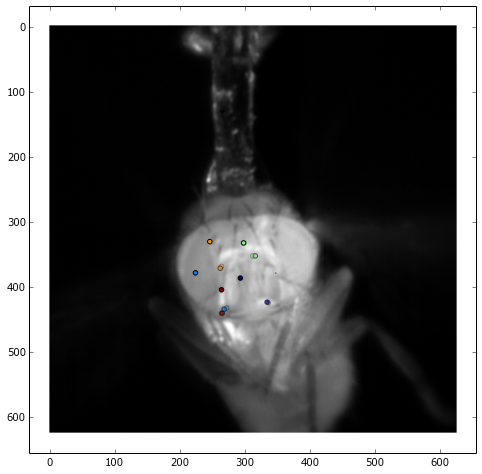

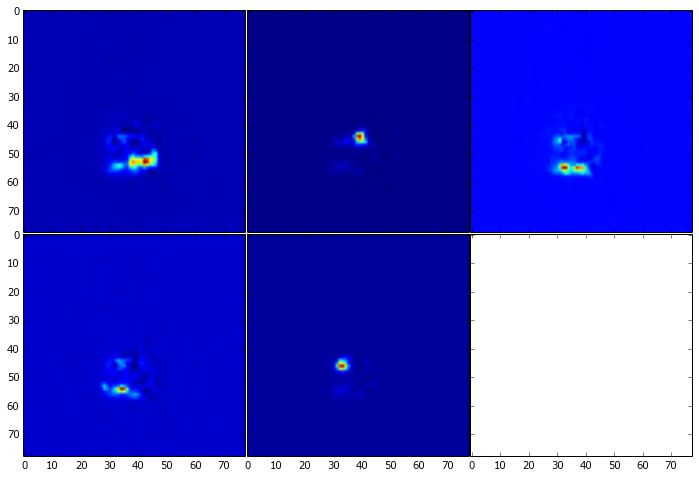

In [100]:
aa = dpred.mean(1)
idx = np.where(aa>15)[0]
excount = 1
from matplotlib import cm
from mpl_toolkits.axes_grid1 import ImageGrid
fig = plt.figure(figsize=(8,8))
print(idx.shape)
for ex in [4,]:
    curi = idx[ex]
    plt.gray()
    plt.imshow(all_ims[curi,0,:,:])
    pt = slice(0,5)
    plt.scatter(all_locs[curi,:,0],all_locs[curi,:,1],
                c=np.linspace(0,1,conf.n_classes),hold=True,cmap=cm.jet)
    plt.scatter(base_predlocs[curi,pt,1],base_predlocs[curi,pt,0],
                c=np.linspace(0,1,conf.n_classes),hold=True,alpha=0.3,cmap=cm.jet)
    plt.scatter(fine_predlocs[curi,pt,1],fine_predlocs[curi,pt,0],
                c=np.linspace(0,1,conf.n_classes),hold=True,alpha=0.6,cmap=cm.jet)
    plt.show()
    fig = plt.figure(figsize=(12,12))
    grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(2, 3),  # creates 2x2 grid of axes
                 axes_pad=0.02,  # pad between axes in inch.
                 )
    plt.jet()
    ii = base_pred[curi,:,:,:]
    ii = ii[:,:,[0,2,4,1,3]]
    for ndx in range(5):
        grid[ndx].imshow(ii[:,:,ndx])

In [90]:
a = np.array([[[2,3,1],[4,6,9]]])
print(a.shape)
print(a)
k = a[0,:,[2,1,0]]
# k = k[:,[2,1,0]]
print(k)
print(k.shape)

(1, 2, 3)
[[[2 3 1]
  [4 6 9]]]
[[1 9]
 [3 6]
 [2 4]]
(3, 2)


In [1]:
import tensorflow as tf
weights = tf.Variable(tf.random_normal([3, 3], stddev=0.35),
                      name="weights")
saver = tf.train.Saver()
sess = tf.InteractiveSession()
sess.run(tf.initialize_all_variables())
saver.save(sess,'/home/mayank/temp/testTF.ckpt',global_step = 30,latest_filename = 'testTF_proto')
yy = weights.eval()
print(yy)

[[ 0.7859543  -0.29081672 -0.0293389 ]
 [-0.4794037   0.36577201 -0.33753881]
 [-0.56229913 -0.30110621  0.28621113]]


In [1]:
import tensorflow as tf
weights = tf.Variable(tf.random_normal([3, 3], stddev=0.35),
                      name="weights")
saver = tf.train.Saver()
sess = tf.InteractiveSession()
ckpt = tf.train.get_checkpoint_state("/home/mayank/temp/","testTF_proto")
print(ckpt)
if not ckpt:
    print('no')
saver.restore(sess,ckpt.model_checkpoint_path)    
yy = weights.eval()
print(yy)

model_checkpoint_path: "/home/mayank/temp/testTF.ckpt-30"
all_model_checkpoint_paths: "/home/mayank/temp/testTF.ckpt-30"

[[ 0.7859543  -0.29081672 -0.0293389 ]
 [-0.4794037   0.36577201 -0.33753881]
 [-0.56229913 -0.30110621  0.28621113]]


In [7]:
gg = ['asf',]
len(gg)

1

In [ ]:
import PoseTrain
reload(PoseTrain)
import stephenHeadConfig as conf
import tensorflow as tf

pobj = PoseTrain.PoseTrain(conf,PoseTrain.PoseTrain.Nets.Base)
pobj.baseTrain(restore=True)

In [1]:
# check why the train loss is so low..
# its because the blur_radius for label was being scaled by image scale
import PoseTrain
reload(PoseTrain)
import stephenHeadConfig as conf
reload(conf)
import tensorflow as tf
import matplotlib.pyplot as plt

pobj = PoseTrain.PoseTrain(conf,PoseTrain.PoseTrain.Nets.Base)
pobj.createPH()
pobj.createFeedDict()
with tf.variable_scope('base'):
    pobj.createBaseNetwork()
    
pobj.cost = tf.nn.l2_loss(pobj.basePred-pobj.ph['y'])
pobj.openDBs()
pobj.createOptimizer()
pobj.createBaseSaver()
txn =  pobj.env.begin()
valtxn = pobj.valenv.begin()
sess=tf.InteractiveSession()

pobj.createCursors(txn,valtxn)
pobj.restoreBase(sess,True)
pobj.updateFeedDict(pobj.DBType.Train)
train_loss = pobj.computeLoss(sess,[pobj.cost])[0]

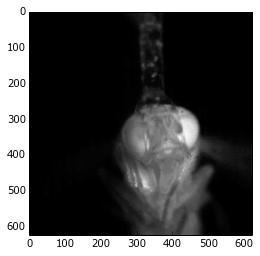

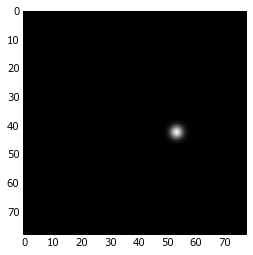

(-1.00204, 1.0, 1.3791000839315011, 69.682380676269531)


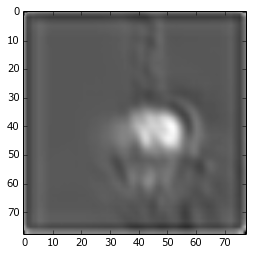

In [3]:
# check why the train loss is so low..
# its because the blur_radius for label was being scaled by image scale
plt.gray()
plt.imshow(pobj.xs[0,0,:,:])
len(pobj.basetrainData['train_err'])
labels = pobj.feed_dict[pobj.ph['y']]
plt.show()
plt.imshow(labels[0,:,:,0])
plt.show()
pred = sess.run(pobj.basePred,pobj.feed_dict)
plt.imshow(pred[0,:,:,0])
aa = labels[0,:,:,0]-pred[0,:,:,0]
bb = aa.flatten().sum()
print(pred.min(),labels.max(),bb,train_loss)

/home/mayank/work/python2_venv/newNumpy/local/lib/python2.7/site-packages/IPython/core/formatters.py:92: DeprecationWarning: DisplayFormatter._ipython_display_formatter_default is deprecated: use @default decorator instead.
  def _ipython_display_formatter_default(self):
/home/mayank/work/python2_venv/newNumpy/local/lib/python2.7/site-packages/IPython/core/formatters.py:669: DeprecationWarning: PlainTextFormatter._singleton_printers_default is deprecated: use @default decorator instead.
  def _singleton_printers_default(self):


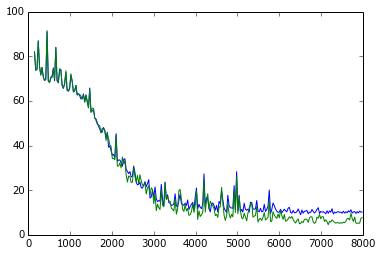

In [2]:
import pickle
with open('cacheHead/headbasetraindata','rb') as tdfile:
    trainData = pickle.load(tdfile)

plt.plot(trainData['step_no'][5:],trainData['val_err'][5:])      
plt.plot(trainData['step_no'][5:],trainData['train_err'][5:],hold=True)      
plt.show()

In [1]:
import PoseTrain
reload(PoseTrain)
import stephenHeadConfig as conf
import tensorflow as tf

pobj = PoseTrain.PoseTrain(conf)
pobj.mrfTrain(restore=False)

Loading base from /home/mayank/work/tensorflow/cacheHead/headBase-4000
Not loading mrf variables. Initializing them
Initializing variable:beta1_power:0
Initializing variable:beta2_power:0
Iter 0, Train = 1106.163, Val = 2186.109 (11.2,11.0)
Saved state to /home/mayank/work/tensorflow/cacheHead/headMRF-0
Iter 30, Train = 310.333, Val = 345.940 (9.8,12.2)
Iter 60, Train = 136.826, Val = 169.363 (10.8,11.0)
Iter 90, Train = 104.587, Val = 94.483 (12.1,12.3)
Iter 120, Train = 43.021, Val = 87.587 (12.9,10.8)
Iter 150, Train = 38.237, Val = 55.477 (9.1,11.6)
Iter 180, Train = 33.501, Val = 50.375 (8.7,11.5)
Iter 210, Train = 30.895, Val = 40.282 (7.7,11.4)
Iter 240, Train = 24.303, Val = 37.906 (8.6,11.8)
Iter 270, Train = 25.017, Val = 33.714 (8.1,11.3)
Iter 300, Train = 20.504, Val = 30.966 (11.3,11.9)
Iter 330, Train = 23.386, Val = 29.168 (16.9,10.8)
Iter 360, Train = 21.795, Val = 25.555 (11.9,12.3)
Iter 390, Train = 20.509, Val = 25.777 (13.9,11.0)
Iter 420, Train = 20.103, Val = 21.8

In [1]:
import PoseTrain
reload(PoseTrain)
import stephenHeadConfig as conf
import tensorflow as tf

restore = False
self = PoseTrain.PoseTrain(conf)
self.createPH()
self.createFeedDict()

with tf.variable_scope('base'):
    self.createBaseNetwork()

with tf.variable_scope('mrf'):
    mrf_out,all_wts = self.createMRFNetwork()

self.createBaseSaver()
self.createMRFSaver()

self.cost = tf.nn.l2_loss(self.mrfPred-self.ph['y'])
basecost =  tf.nn.l2_loss(self.basePred-self.ph['y'])
self.openDBs()
self.createOptimizer()

txn = self.env.begin()
valtxn = self.valenv.begin()
sess = tf.InteractiveSession()

self.loadBase(sess,self.conf.baseIter4MRFTrain)
self.restoreMRF(sess,restore)
self.initializeRemainingVars(sess)

self.createCursors(txn,valtxn)

Loading base from /home/mayank/work/tensorflow/cacheHead/headBase-4000
Not loading mrf variables. Initializing them
Initializing variable:beta1_power:0
Initializing variable:beta2_power:0


In [2]:
modlabels = (self.ph['y']+1.)/2
basecost =  tf.nn.l2_loss(self.basePred-self.ph['y'])
cost = tf.nn.l2_loss(self.mrfPred-modlabels)
self.updateFeedDict(self.DBType.Train)

preds = sess.run([self.basePred,self.mrfPred,modlabels]+mrf_out,feed_dict=self.feed_dict)
wts = sess.run(all_wts,feed_dict=self.feed_dict)

(26, 26, 1, 5)
0.693147
(1.4391092, 0.0052941157)
(0.70075291, 9.9999997e-05)
(0.69314718, 0.31326166)


/home/mayank/work/python2_venv/newNumpy/local/lib/python2.7/site-packages/IPython/core/formatters.py:92: DeprecationWarning: DisplayFormatter._ipython_display_formatter_default is deprecated: use @default decorator instead.
  def _ipython_display_formatter_default(self):
/home/mayank/work/python2_venv/newNumpy/local/lib/python2.7/site-packages/IPython/core/formatters.py:669: DeprecationWarning: PlainTextFormatter._singleton_printers_default is deprecated: use @default decorator instead.
  def _singleton_printers_default(self):


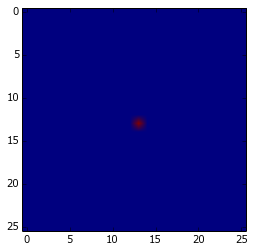

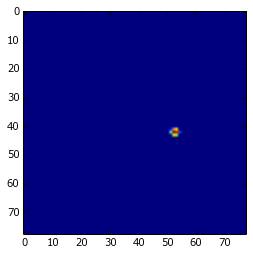

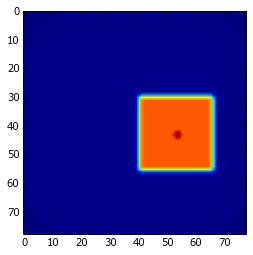

In [3]:
import scipy
print(wts[0].shape)
print(wts[0].max())
vv = np.maximum(preds[0][0,:,:,0],0.0001)
oo = scipy.signal.convolve2d(vv,wts[0][:,:,0,0],mode='same')
print(oo.max(),oo.min())
print(vv.max(),vv.min())
print(wts[0][:,:,0,0].max(),wts[0][:,:,0,0].min())
plt.imshow(wts[0][:,:,0,0])
plt.show()
plt.imshow(vv)
plt.show()
plt.imshow(oo)

(32, 78, 78, 5)
(2.5979326, 0.0032806797)


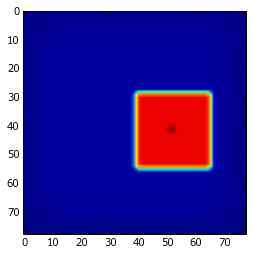

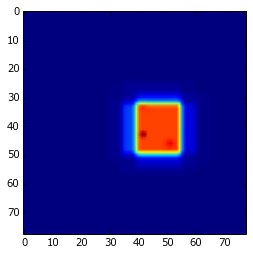

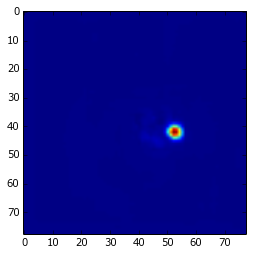

In [4]:
print(preds[1].shape)
print(preds[1][0,:,:,1].max(),preds[1][0,:,:,1].min())
plt.imshow(preds[3][0,:,:,0])
plt.show()
plt.imshow(preds[1][0,:,:,1])
plt.show()
plt.imshow(preds[0][0,:,:,0])

(32, 78, 78, 5)


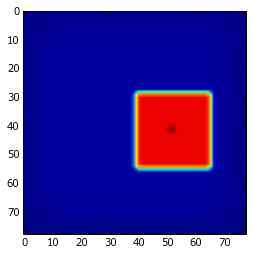

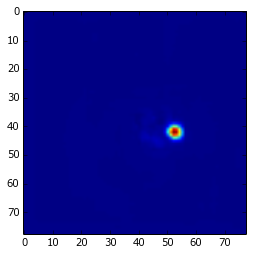

In [8]:
print(preds[1].shape)
plt.imshow(preds[3][0,:,:,0])
plt.show()
plt.imshow(preds[1][0,:,:,0])
plt.imshow(preds[0][0,:,:,0])

(26, 26, 5, 5)
0.2


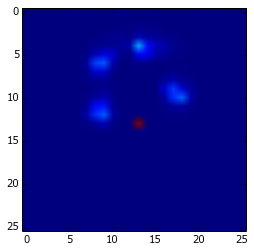

In [3]:
import PoseTools
reload(PoseTools)
import stephenHeadConfig as conf

ll = PoseTools.initMRFweights(conf)
oo = ll[:,:,4,:].sum(2)
print(ll.shape)
plt.imshow(oo)
print(oo.max())

(2, 2, 1, 1)
(1, 10, 10, 1)
[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  4.  3.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  2.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]
[[ 1.  2.]
 [ 3.  4.]]


Exception AssertionError: AssertionError() in <bound method InteractiveSession.__del__ of <tensorflow.python.client.session.InteractiveSession object at 0x7fe52593ad50>> ignored


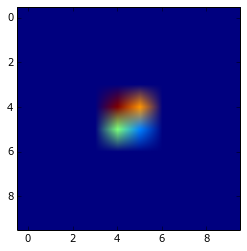

In [8]:
import tensorflow as tf

aa = np.zeros([1,10,10,1])
aa[0,5,5,0] = 1
bb = np.array([[1.,2],[3,4]])
bb = bb[:,:,np.newaxis,np.newaxis]
print(bb.shape)
print(aa.shape)
aat = tf.constant(aa,dtype=tf.float32)
bbt = tf.constant(bb,dtype=tf.float32)
zz = tf.nn.conv2d(aat,bbt,strides=[1,1,1,1],padding= 'SAME')
sess = tf.InteractiveSession()
sess.run(tf.initialize_all_variables())
zz1 = zz.eval()
plt.imshow(zz1[0,:,:,0])
print(zz1[0,:,:,0])
print(bb[:,:,0,0])

In [2]:
print(pobj.basePred)

Tensor("base/add:0", shape=(?, 78, 78, 5), dtype=float32)
